In [1]:
#conda install -c conda-forge folium

# SETORES CENSITÁRIOS

In [2]:
%matplotlib inline

import pandas as pd 
import geopandas as gpd

import os 
import zipfile
import shutil

In [3]:
# Criando diretorio temporario
dir = '../01.Dados/Mapas/RJ-SETOR/TEMP'

if not os.path.exists(dir):
    os.makedirs(dir)

In [4]:
# Lendo os arquivos de dentro da pasta
for root, dirs, files in os.walk('../01.Dados/Mapas/RJ-SETOR/DADOS'):
    print(files)

['33045570533.zip', '33045570527.zip', '33045570526.zip', '33045570532.zip', '33045570524.zip', '33045570530.zip', '33045570519.zip', '33045570531.zip', '33045570525.zip', '33045570509.zip', '33045570521.zip', '33045570535.zip', '33045570534.zip', '33045570520.zip', '33045570508.zip', '33045570536.zip', '33045570522.zip', '33045570523.zip', '33045570537.zip', '33045570512.zip', '33045570506.zip', '33045570507.zip', '33045570513.zip', '33045570511.zip', '33045570539.zip', '33045570538.zip', '33045570510.zip', '33045570528.zip', '33045570514.zip', '33045570515.zip', '33045570529.zip', '33045570517.zip', '33045570516.zip']


In [5]:
# Inserindo os arquivos em uma lista
filenames = []
for root, dirs, files in os.walk('../01.Dados/Mapas/RJ-SETOR/DADOS'):
    filenames = files
    
filenames

['33045570533.zip',
 '33045570527.zip',
 '33045570526.zip',
 '33045570532.zip',
 '33045570524.zip',
 '33045570530.zip',
 '33045570519.zip',
 '33045570531.zip',
 '33045570525.zip',
 '33045570509.zip',
 '33045570521.zip',
 '33045570535.zip',
 '33045570534.zip',
 '33045570520.zip',
 '33045570508.zip',
 '33045570536.zip',
 '33045570522.zip',
 '33045570523.zip',
 '33045570537.zip',
 '33045570512.zip',
 '33045570506.zip',
 '33045570507.zip',
 '33045570513.zip',
 '33045570511.zip',
 '33045570539.zip',
 '33045570538.zip',
 '33045570510.zip',
 '33045570528.zip',
 '33045570514.zip',
 '33045570515.zip',
 '33045570529.zip',
 '33045570517.zip',
 '33045570516.zip']

In [6]:
#Inserindo na pasta temporaria
for item in filenames:
    zip_ref = zipfile.ZipFile('../01.Dados/Mapas/RJ-SETOR/DADOS/' + item, 'r')
    zip_ref.extractall(dir)
    zip_ref.close()

In [7]:
filenames[0]

'33045570533.zip'

In [8]:
filenames[0][:-4]

'33045570533'

In [9]:
[gpd.read_file(dir + '/' + item[:-4] + '_setor.shp') for item in filenames]

[       ID1       CD_GEOCODI    TIPO    CD_GEOCODB NM_BAIRRO CD_GEOCODD  \
 0   410890  330455705330018  URBANO  330455705156   Rocinha  330455705   
 1   410891  330455705330019  URBANO  330455705156   Rocinha  330455705   
 2   410892  330455705330020  URBANO  330455705156   Rocinha  330455705   
 3   410946  330455705330064  URBANO  330455705156   Rocinha  330455705   
 4   410893  330455705330021  URBANO  330455705156   Rocinha  330455705   
 ..     ...              ...     ...           ...       ...        ...   
 77  410904  330455705330032  URBANO  330455705156   Rocinha  330455705   
 78  410906  330455705330034  URBANO  330455705156   Rocinha  330455705   
 79  410907  330455705330035  URBANO  330455705156   Rocinha  330455705   
 80  410960  330455705330078  URBANO  330455705156   Rocinha  330455705   
 81  410964  330455705330082  URBANO  330455705156   Rocinha  330455705   
 
         NM_DISTRIT CD_GEOCODS NM_SUBDIST CD_GEOCODM      NM_MUNICIP  \
 0   RIO DE JANEIRO  33045

In [10]:
setor = pd.concat([gpd.read_file(dir + '/' + item[:-4] + '_setor.shp') for item in filenames], ignore_index=True)

In [11]:
# Excluindo a pasta temporaria
shutil.rmtree(dir)

In [12]:
setor

,ID1,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODD,NM_DISTRIT,CD_GEOCODS,NM_SUBDIST,CD_GEOCODM,NM_MUNICIP,NM_MESO,NM_MICRO,geometry
0,410890,330455705330018,URBANO,330455705156,Rocinha,330455705,RIO DE JANEIRO,330455705,ROCINHA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.24987 -22.99129, -43.24974 -22.9..."
1,410891,330455705330019,URBANO,330455705156,Rocinha,330455705,RIO DE JANEIRO,330455705,ROCINHA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.24917 -22.99144, -43.24919 -22.9..."
2,410892,330455705330020,URBANO,330455705156,Rocinha,330455705,RIO DE JANEIRO,330455705,ROCINHA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.24824 -22.99114, -43.24823 -22.9..."
3,410946,330455705330064,URBANO,330455705156,Rocinha,330455705,RIO DE JANEIRO,330455705,ROCINHA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.24419 -22.98651, -43.24418 -22.9..."
4,410893,330455705330021,URBANO,330455705156,Rocinha,330455705,RIO DE JANEIRO,330455705,ROCINHA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.24829 -22.99039, -43.24825 -22.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10499,404349,330455705160258,URBANO,330455705042,Brás de Pina,330455705,RIO DE JANEIRO,330455705,PENHA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.30376 -22.83951, -43.30406 -22.8..."
10500,404350,330455705160259,URBANO,330455705042,Brás de Pina,330455705,RIO DE JANEIRO,330455705,PENHA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.30826 -22.83500, -43.30823 -22.8..."
10501,404351,330455705160260,URBANO,330455705042,Brás de Pina,330455705,RIO DE JANEIRO,330455705,PENHA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.30584 -22.83599, -43.30615 -22.8..."
10502,404352,330455705160261,URBANO,330455705042,Brás de Pina,330455705,RIO DE JANEIRO,330455705,PENHA,3304557,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,RIO DE JANEIRO,"POLYGON ((-43.31246 -22.83809, -43.31169 -22.8..."


In [13]:
setor.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - SIRGAS 2000 by country
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [14]:
#Alterando crs
setor = setor.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

<AxesSubplot:>

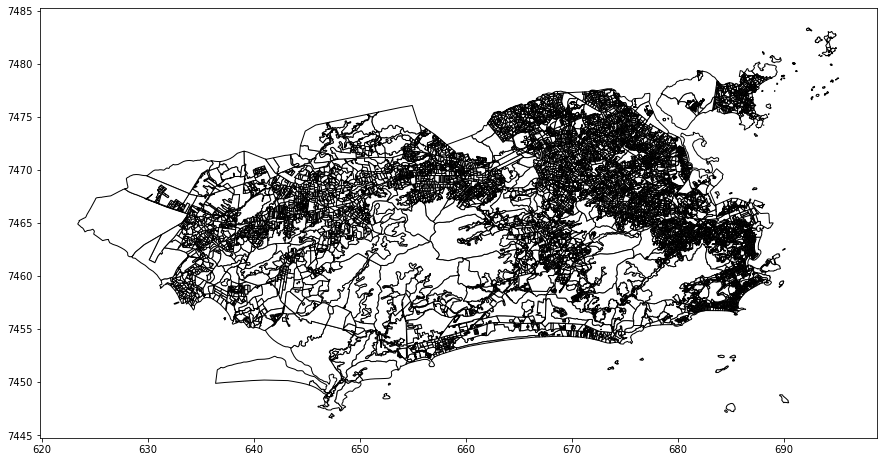

In [15]:
#Plotando
setor.plot(color='white', edgecolor = 'black', figsize=(15,8))

In [18]:
# Salvando arquivo
setor.to_file('../01.Dados/Mapas/RJ-SETOR/RJ-SETOR.shp')

<AxesSubplot:>

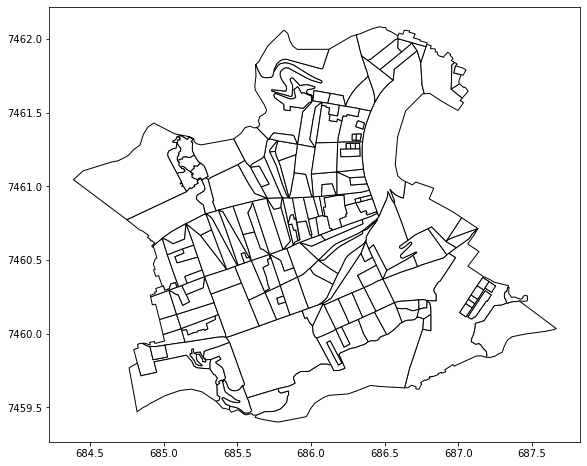

In [17]:
# Visualizando Botafogo
botafogo = setor[setor['NM_BAIRRO'] == 'Botafogo']
botafogo.plot(color='white', edgecolor = 'black', figsize=(15,8))